# Sociomepy

Sociomepy is a Python package that provides a number of convient functions, data structures, and models for manipulating socio-environmental data. Implementation-wise it is a wrapper around the GeoPandas library and is fully compatitble with all data formats that geopandas accepts.

## SociomeDataFrame
SociomeDataFrame is a geospatial dataframe that is designed to work with the sociome project. We define our own wrapper data structure here because there is a lot of project-specific functionality that we need such as logging, data provenance, and handling specific data formats. 

Let's see how it works! First, let's run some code to set up the environment (you only need to do this if you are in the wrong working directory).

In [1]:
import sys
import os
parent = os.path.abspath('..')
sys.path.append(parent)

Now, let's import a SociomeDataFrame. A SociomeDataFrame represents social indicators for address points in a city or other region.

In [2]:
from sociomepy.data import SociomeDataFrame

We can initialize this SociomeDataFrame with many different types of data. In this example, we will work with an ArcGIS address file of the City of Chicago. The code below will take a wile to run!

In [3]:
s = SociomeDataFrame.from_arcgis_file('../data/chicago-addresses.csv')

/Users/sanjaykrishnan/Documents/sociomepy/sociomepy/data.py:126: DtypeWarning: Columns (5,6,7,8,12,14,17,20,23,28,38,40,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


There are a couple of things that we can do to help debug SociomeDataFrames since they will generally be slow (there are a lot of addresses even in a small city!). For example, the following code will only return 1000 addresses.

In [4]:
s = SociomeDataFrame.from_arcgis_file('../data/chicago-addresses.csv', nrows=1000)

## Adding Subdivisions
A subdivision is a partitioning of the world into disjoint units such as zipcodes, census tracts, etc. Every sociome dataframe can be associated with one or more subdivisions over its data. Based on the ArcGIS data used above, we currently have data subdivided by zipcode.

In [5]:
s.subdivisions

['Post_Code']

We can add new subdivisions to the data. Any GeoPandas dataframe with polygonal geometry can be used. For example, we can combine this data with census tracts.

In [6]:
import geopandas as gpd

gdf = gpd.read_file('../data/acs')
s.add_subdivision(gdf, 'tract', 'GEOID')

/Users/sanjaykrishnan/Documents/sociome-data-commons-v2/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3378: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Lat,Long,ADDRDELIV,Post_Comm,State,Post_Code,LSt_Type,LSt_PreDir,geometry,LOCATIONS,index_right,tract
0,41.935796,-87.673357,1763 WEST WELLINGTON AVENUE,CHICAGO,IL,60657,AVE,W,POINT (-87.67336 41.93580),1,1014.0,17031062600
1,41.855258,-87.667139,1622 WEST CULLERTON STREET,CHICAGO,IL,60608,ST,W,POINT (-87.66714 41.85526),1,1194.0,17031310800
2,41.917926,-87.651651,917 WEST ARMITAGE AVENUE,CHICAGO,IL,60614,AVE,W,POINT (-87.65165 41.91793),1,814.0,17031832600
3,41.525564,-87.695313,20018 MOHAWK TRAIL,OLYMPIA FIELDS,IL,60461,TRL,NaN,POINT (-87.69531 41.52556),1,894.0,17031830005
4,41.525317,-87.695269,20024 MOHAWK TRAIL,OLYMPIA FIELDS,IL,60461,TRL,NaN,POINT (-87.69527 41.52532),1,894.0,17031830005
...,...,...,...,...,...,...,...,...,...,...,...,...
995,41.564317,-87.691521,17820 OLD TRAIL ROAD,HAZEL CREST,IL,60429,RD,NaN,POINT (-87.69152 41.56432),1,220.0,17031825503
996,41.562502,-87.697845,3317 MONTMARTE AVENUE,HAZEL CREST,IL,60429,AVE,NaN,POINT (-87.69785 41.56250),1,221.0,17031825504
997,42.044681,-88.098579,760 ALCOA LANE,HOFFMAN ESTATES,IL,60169,LN,NaN,POINT (-88.09858 42.04468),1,1055.0,17031804715
998,42.100556,-87.920036,210 WATERFORD DRIVE,PROSPECT HEIGHTS,IL,60070,DR,NaN,POINT (-87.92004 42.10056),1,1003.0,17031802605


In [7]:
s.subdivisions

['Post_Code', 'tract']

We can also associate different metrics with these subdivisions. For example, the code below adds and ACS variable to the sociomedataframe

In [8]:
s.merge_on_subdivision(gdf, 'tract', 'GEOID', {'SE_A1006_2': 'income'})

,Lat,Long,ADDRDELIV,Post_Comm,State,Post_Code,LSt_Type,LSt_PreDir,geometry,LOCATIONS,index_right,tract,GEOID,income
0,41.935796,-87.673357,1763 WEST WELLINGTON AVENUE,CHICAGO,IL,60657,AVE,W,POINT (-87.67336 41.93580),1,1014.0,17031062600,17031062600,381.0
1,41.855258,-87.667139,1622 WEST CULLERTON STREET,CHICAGO,IL,60608,ST,W,POINT (-87.66714 41.85526),1,1194.0,17031310800,17031310800,1130.0
2,41.917926,-87.651651,917 WEST ARMITAGE AVENUE,CHICAGO,IL,60614,AVE,W,POINT (-87.65165 41.91793),1,814.0,17031832600,17031832600,883.0
3,41.525564,-87.695313,20018 MOHAWK TRAIL,OLYMPIA FIELDS,IL,60461,TRL,NaN,POINT (-87.69531 41.52556),1,894.0,17031830005,17031830005,308.0
4,41.525317,-87.695269,20024 MOHAWK TRAIL,OLYMPIA FIELDS,IL,60461,TRL,NaN,POINT (-87.69527 41.52532),1,894.0,17031830005,17031830005,308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,41.564317,-87.691521,17820 OLD TRAIL ROAD,HAZEL CREST,IL,60429,RD,NaN,POINT (-87.69152 41.56432),1,220.0,17031825503,17031825503,422.0
996,41.562502,-87.697845,3317 MONTMARTE AVENUE,HAZEL CREST,IL,60429,AVE,NaN,POINT (-87.69785 41.56250),1,221.0,17031825504,17031825504,521.0
997,42.044681,-88.098579,760 ALCOA LANE,HOFFMAN ESTATES,IL,60169,LN,NaN,POINT (-88.09858 42.04468),1,1055.0,17031804715,17031804715,311.0
998,42.100556,-87.920036,210 WATERFORD DRIVE,PROSPECT HEIGHTS,IL,60070,DR,NaN,POINT (-87.92004 42.10056),1,1003.0,17031802605,17031802605,585.0


## Plotting
We provide some basic mapping and plotting functionality.

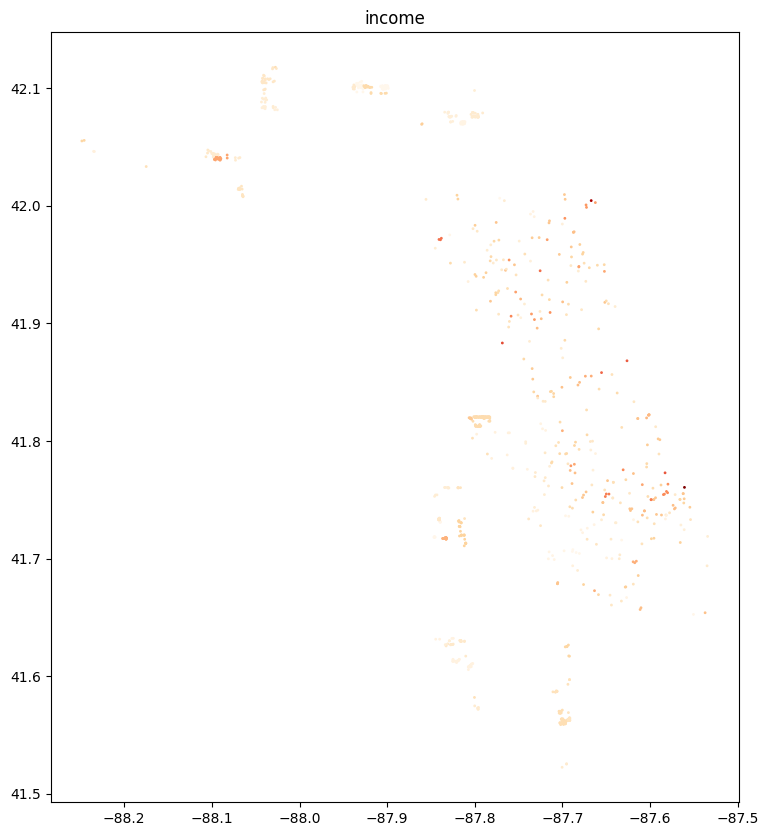

In [9]:
%matplotlib inline
s.to_mpl_inline(['income'])